In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import itertools
from sklearn.metrics import confusion_matrix

## Data visualization

In [2]:
# Import the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Get some information about the shapes of the data
print(f'Shape of the x_train: {x_train.shape}')
print(f'Shape of the y_train: {y_train.shape}')

Shape of the x_train: (50000, 32, 32, 3)
Shape of the y_train: (50000, 1)


In [4]:
# Setting a name for a corresponding label
labels_name = ('airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
# Creating a function to know more about the inputs which are going to be used for training
def show_random_example(x, y, labels_name):
  """By giving a images and their corresponding labels
   you would get 9 random of them"""
  random_idx = random.sample(range(len(x)), 9)
  random_images = [x[i] for i in random_idx]
  random_labels = [labels_name[y[i, 0]] for i in random_idx]

  plt.figure(figsize=(7, 8))
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(random_images[i])
    plt.title(f"{random_labels[i]}")
    plt.axis("off")

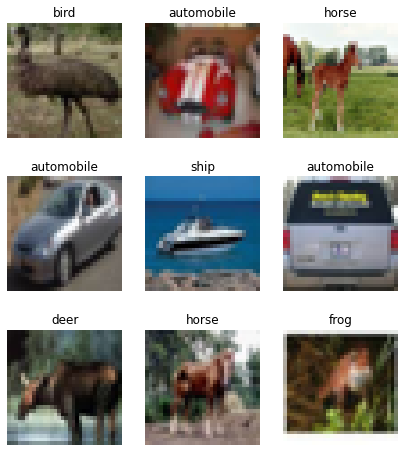

In [6]:
# Visualize some of the random images from the training set
show_random_example(x_train, y_train, labels_name)

## Training the model

In [7]:
# Creating the model
model = tf.keras.Sequential([
  # Preprocessing layers
  tf.keras.layers.Input(shape=(32, 32, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomFlip(mode="horizontal"),
  
  # 1st Layer
  tf.keras.layers.Conv2D(filters=32,
                         kernel_size=(3, 3),
                         strides=(1, 1),
                         activation='relu'),
  tf.keras.layers.Conv2D(32, 3, 1, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),

  # 2nd Layer
  tf.keras.layers.Conv2D(64, 3, 1, padding="same", activation='relu'),
  tf.keras.layers.Conv2D(64, 3, 1, padding="same", activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),

  # 3rd Layer
  tf.keras.layers.Conv2D(128, 3, 1, activation='relu'),
  tf.keras.layers.Conv2D(128, 3, 1, activation='relu'),
  tf.keras.layers.BatchNormalization(),

  # FC Layers
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Watch the model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRota  (None, 32, 32, 3)        0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 32, 32, 3)         0         
                                                                 
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                        

In [9]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
# Adding callbacks
es = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy", 
        patience=10,
        verbose=1,
        mode="max",
        restore_best_weights=True,
     )

rp = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [11]:
# Fitting the model
history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=128,
                    steps_per_epoch=x_train.shape[0]//128,
                    validation_data=(x_test, y_test),
                    validation_batch_size=128,
                    validation_steps=x_test.shape[0]//128,
                    epochs=100,
                    callbacks=[es, rp])

Epoch 1/100
390/390 [==============================] - 11s 17ms/step - loss: 1.6633 - accuracy: 0.4194 - val_loss: 2.4260 - val_accuracy: 0.2728 - lr: 0.0010
Epoch 2/100
390/390 [==============================] - 6s 14ms/step - loss: 1.2665 - accuracy: 0.5483 - val_loss: 1.1178 - val_accuracy: 0.6088 - lr: 0.0010
Epoch 3/100
390/390 [==============================] - 5s 13ms/step - loss: 1.1046 - accuracy: 0.6099 - val_loss: 1.1667 - val_accuracy: 0.6180 - lr: 0.0010
Epoch 4/100
390/390 [==============================] - 5s 13ms/step - loss: 0.9982 - accuracy: 0.6482 - val_loss: 1.0393 - val_accuracy: 0.6604 - lr: 0.0010
Epoch 5/100
390/390 [==============================] - 5s 13ms/step - loss: 0.9272 - accuracy: 0.6749 - val_loss: 0.9263 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 6/100
390/390 [==============================] - 5s 13ms/step - loss: 0.8716 - accuracy: 0.6964 - val_loss: 0.8676 - val_accuracy: 0.7063 - lr: 0.0010
Epoch 7/100
390/390 [==============================] - 5s

## Evaluating the model

In [17]:
# Evaluating the model
print("Evaluating...")
results = model.evaluate(x_test, y_test, verbose=0)
print("\nModel's accuracy on the test set is: %.4f" % results[1])
print("Model's loss on the test set is: %.4f" % results[0])

Evaluating...

Model's accuracy on the test set is: 0.8494
Model's loss on the test set is: 0.4752


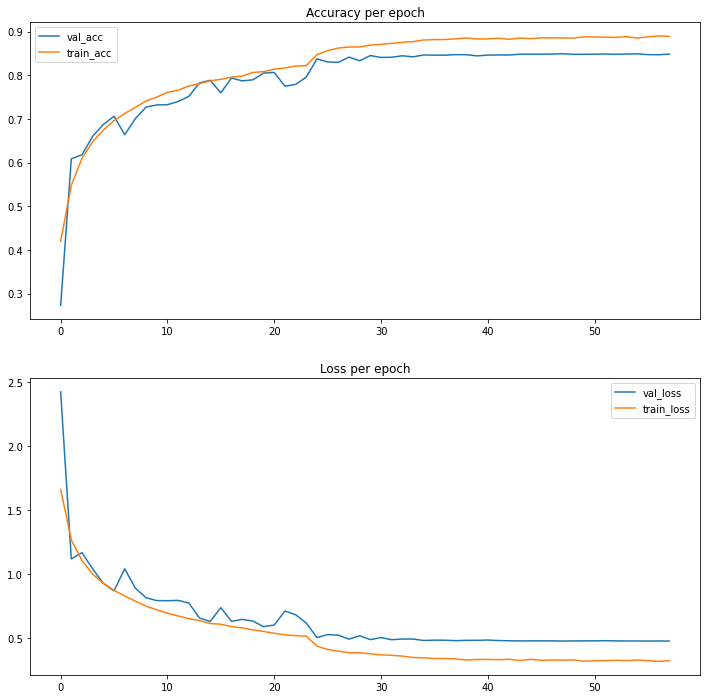

In [18]:
# Saving data from history into a pandas dataframe
val_acc = pd.DataFrame(history.history['val_accuracy'])
train_acc = pd.DataFrame(history.history['accuracy'])
val_loss = pd.DataFrame(history.history['val_loss'])
train_loss = pd.DataFrame(history.history['loss'])

# Plotting accuracy and loss curves
plt.figure(figsize=(12, 12));

plt.subplot(2, 1, 1)
plt.plot(val_acc)
plt.plot(train_acc)
plt.legend(["val_acc", "train_acc"])
plt.title("Accuracy per epoch");

plt.subplot(2, 1, 2)
plt.plot(val_loss)
plt.plot(train_loss)
plt.legend(["val_loss", "train_loss"])
plt.title("Loss per epoch");

In [19]:
# Save the predictions in a variable which 
y_test_pred = np.expand_dims(np.argmax(model.predict(x_test), axis=1), axis=-1)

In [20]:
# Creating a function for plotting the confusion matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(14, 14), text_size=9):


  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set lebles to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title="Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size + 7)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the next on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

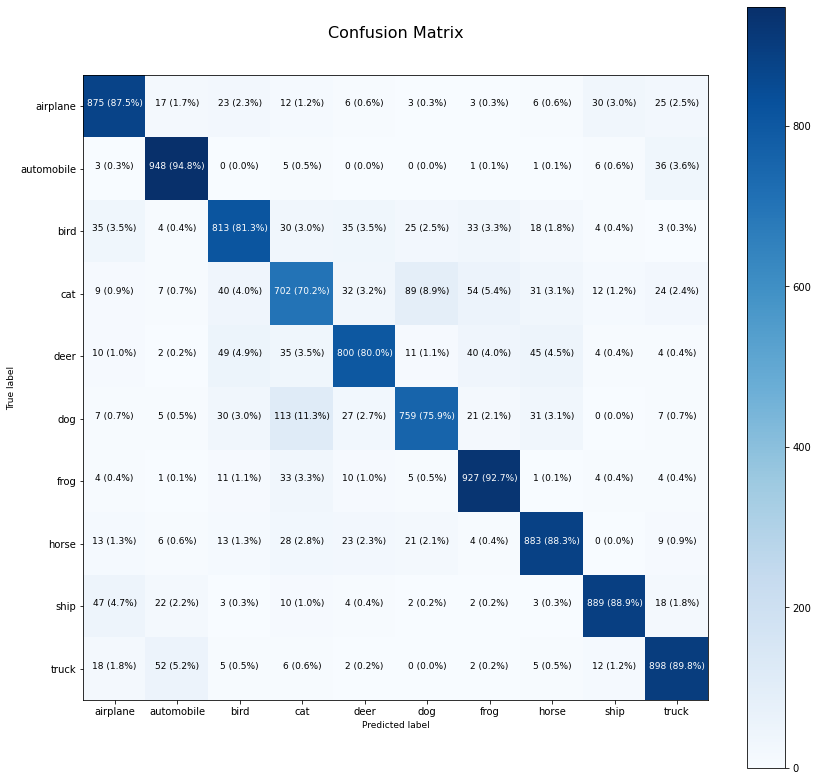

In [21]:
# Plot the confusion matrix
make_confusion_matrix(y_test, y_test_pred, classes=labels_name)